In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

BASE_URL = "http://localhost:2000"

/var/folders/lq/280gf8ld14v161g6ngpdjjnc0000gn/T/ipykernel_97084/4022869642.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
exchange_token = "10939" # Nippon India ETF Nifty Next 50 Junior BeES
quarter_end = "2019-03-31"
quarter_start = "2019-01-01"
one_year_rolling = (pd.to_datetime(quarter_start) - pd.DateOffset(months=3)).strftime("%Y-%m-%d")
one_year_rolling

params = {"start_date": one_year_rolling , "end_date": quarter_start}
candles = requests.get(f"{BASE_URL}/tickers/{exchange_token}/candles", params=params).json()
len(candles)

62

In [30]:
df = pd.DataFrame.from_dict(candles, orient="index")
df_close = df["close"].to_frame()
df_close.head()

,close
2018-10-01,280.81
2018-10-03,277.74
2018-10-04,273.31
2018-10-05,266.52
2018-10-08,263.92


In [42]:
def get_arima_params(closing_prices: pd.DataFrame):
    model = auto_arima(closing_prices)
    return model.get_params()["order"]

order = get_arima_params(df_close)
order

(0, 1, 0)

In [45]:
train_split = int(0.7 * len(df_close)) # 70-30 split
train, test = df_close["close"][:train_split], df_close["close"][train_split:]


model = ARIMA(train, order=order)
model_fit = model.fit()
forecast = model_fit.get_forecast(steps=len(test), alpha=0.05)
predictions = forecast.predicted_mean
ci = model_fit.get_forecast(steps=len(test)).conf_int()
ci

/Users/aaryanpagar/Library/Python/3.11/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aaryanpagar/Library/Python/3.11/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aaryanpagar/Library/Python/3.11/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aaryanpagar/Library/Python/3.11/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be g

,lower close,upper close
43,278.404875,290.335125
44,275.934039,292.805961
45,274.038100,294.701900
46,272.439750,296.300250
47,271.031575,297.708425
48,269.758488,298.981512
49,268.587763,300.152237
50,267.498079,301.241921
51,266.474625,302.265375
52,265.506619,303.233381


In [46]:
predictions

43    284.37
44    284.37
45    284.37
46    284.37
47    284.37
48    284.37
49    284.37
50    284.37
51    284.37
52    284.37
53    284.37
54    284.37
55    284.37
56    284.37
57    284.37
58    284.37
59    284.37
60    284.37
61    284.37
Name: predicted_mean, dtype: float64

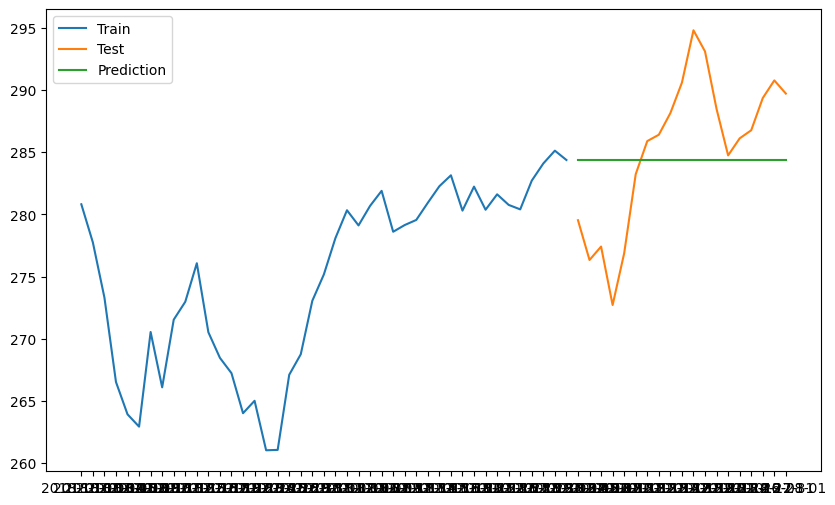

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test")
plt.plot(test.index, forecast, label="Prediction")
plt.legend()
plt.show()

Epoch 1/20


/Users/aaryanpagar/Library/Python/3.11/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.2529
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2140
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1784
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1455
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1152
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0879
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0640
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0446
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0311
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0252
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0279
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0368
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0454
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0486
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0462
Epoch 16/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/st

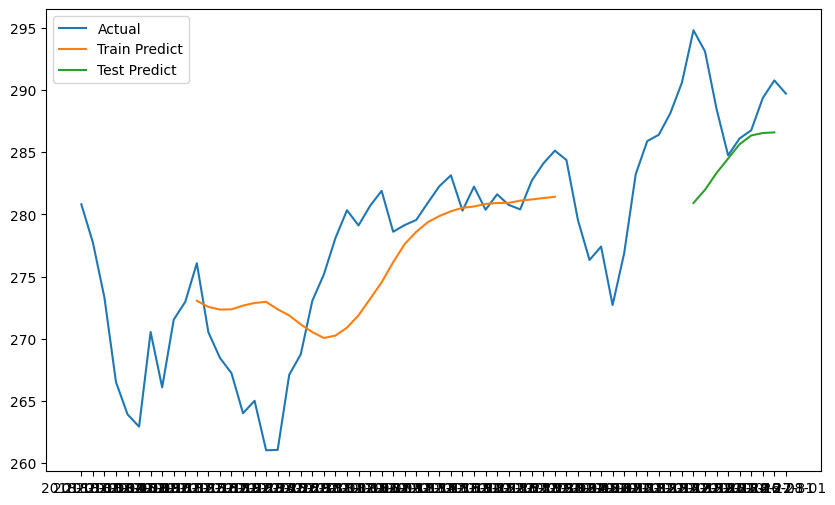

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df["close"].values.reshape(-1, 1))

train_size = int(len(scaled_data) * 0.7)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 10
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(X_train, y_train, epochs=20, batch_size=32)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

train_score = np.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
print(f"Train Score: {train_score:.2f} RMSE")
test_score = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print(f"Test Score: {test_score:.2f} RMSE")

train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[look_back:len(train_predict) + look_back, :] = train_predict

test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
test_plot[len(train_predict) + (look_back * 2) + 1:len(scaled_data) - 1, :] = test_predict

plt.figure(figsize=(10, 6))
plt.plot(df.index, scaler.inverse_transform(scaled_data), label="Actual")
plt.plot(df.index, train_plot, label="Train Predict")
plt.plot(df.index, test_plot, label="Test Predict")
plt.legend()
plt.show()
